The data shows the information of American colleges and universities in 1995, the detail as below. And we would like to classify good colleges and universities. <br>
[ACollege1995R.csv] Columns:<br>
app - No. of applicants received<br>
acc - No. of applicants accepted<br>
enrol - No. of new students enrolled<br>
ftime - No. of full-time undergraduates<br>
ptime - No. of part-time undergraduate<br>
instate - In-state tuition<br>
outstate - Out-state tuition<br>
rbcost - Room and board cost<br>
bkcost - Estimated book cost<br>
phd - % of faculty with Ph.D.<br>
sfratio - Student/faculty ratio<br>
expend - Instructional expenditure per student<br>
grad - Graduation rate<br>
good - With 30%+ new students from top 10% high school class.

In [1]:
library(e1071)
set.seed(852)
data = read.csv('../ACollege1995R.csv')

In [2]:
TnE_test = function(test_y, model) {
    test_table = table(model, test_y)
    error1 = (test_table[2] + test_table[3]) / sum(test_table)
    print(test_table)
    cat('The error is',error1,'\n')
}

In [3]:
id = sample(1:dim(data)[1], size=dim(data)[1]*0.7,replace=F)
train = data[id,]
test = data[-id,]

In [4]:
col.nb = naiveBayes(train[, 1:13], factor(train$good))
col.nbpr = predict(col.nb, test[, 1:13])
TnE_test(test$good, col.nbpr)

     test_y
model   0   1
    0 155  23
    1  19  49
The error is 0.1707317 


# Improvement
In general, naive Bayes model would be improved by log transformation as normal distribution assumption of variables.

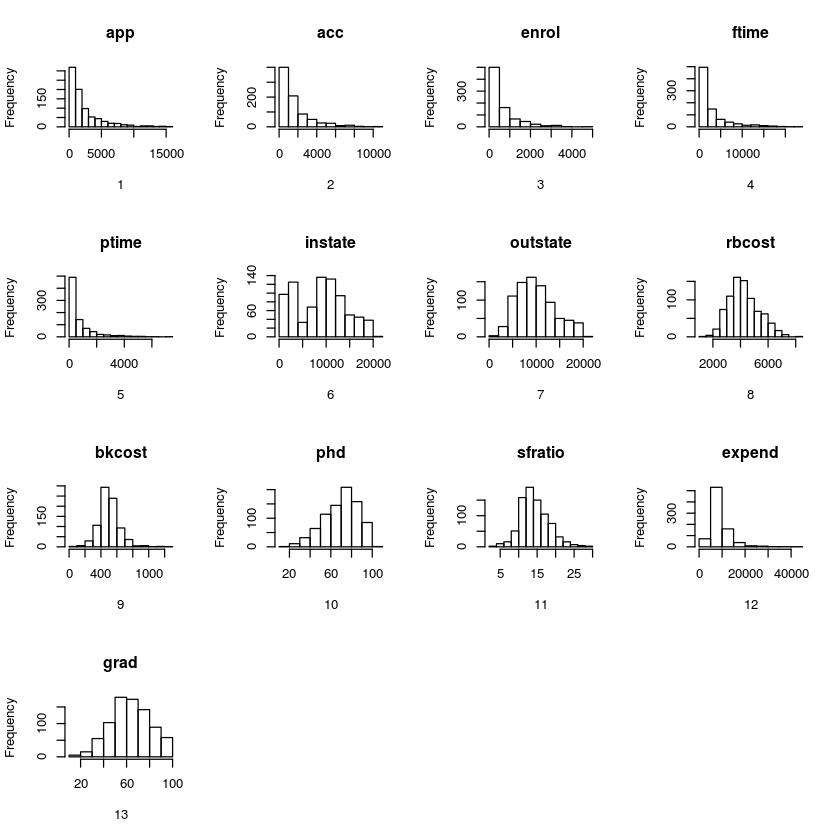

In [5]:
hist_d = as.matrix(data[1:13])
par(mfrow=c(4,4))
for (i in 1:13) hist(hist_d[,i], xlab=i, main=colnames(hist_d)[i])

Look better now!

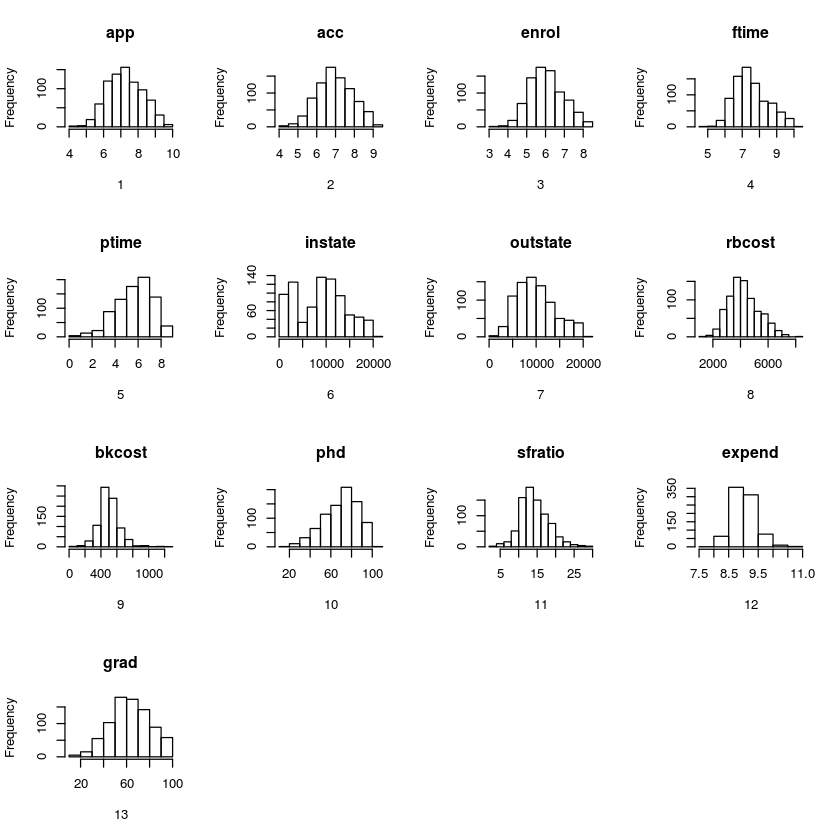

In [6]:
ldata = data
for (i in c(1:5, 12)) {
    ldata[i] = log(data[i])
}
hist_z = as.matrix(ldata[1:13])
par(mfrow=c(4,4))
for (i in 1:13) hist(hist_z[,i], xlab=i, main=colnames(hist_z)[i])
cat('Look better now!')

In [7]:
ltrain = ldata[id,]
ltest = ldata[-id,]

In [8]:
col.nb = naiveBayes(ltrain[, 1:13], factor(ltrain$good))
col.nbpr = predict(col.nb, ltest[, 1:13])
TnE_test(ltest$good, col.nbpr)

     test_y
model   0   1
    0 156  20
    1  18  52
The error is 0.1544715 
